In [219]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import binom, chisquare, chi2, binom
from generate_data import Controller
import scipy
wd = os.path.dirname(os.getcwd())
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)


In [220]:
no_mask = pd.read_csv(wd+'/data/no_mask_no_vacc_10k.csv')

# Question 1
What is the distribution of the number of kids that Tommy infects on Day 1?

First, pivot the raw data and return a dataframe that shows the number

In [221]:
def get_infected_count(day, df):
    df = df.loc[no_mask['day'] == day]
    pivot_tbl = pd.pivot_table(
        df,
        index=['contagious'],
        values='trial',
        aggfunc=["count"],
    ).reset_index()
    pivot_tbl.columns = ['contagious', 'count']
    pivot_tbl['percent'] = pivot_tbl['count']/pivot_tbl['count'].sum()
    return df, pivot_tbl


day_1_df, day_1_observed = get_infected_count(1, no_mask)
day_1_observed

,contagious,count,percent
0,1.0,5566,0.5566
1,2.0,3295,0.3295
2,3.0,941,0.0941
3,4.0,171,0.0171
4,5.0,25,0.0025
5,6.0,2,0.0002


Now, plot a histogram of the frequencies that the number of infected appears on each day.

/var/folders/f3/g1154c6d5hb7y4_s6bzsyw8m0000gn/T/ipykernel_66242/1903163150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_1_df['infected'] = day_1_df['infected'] -1


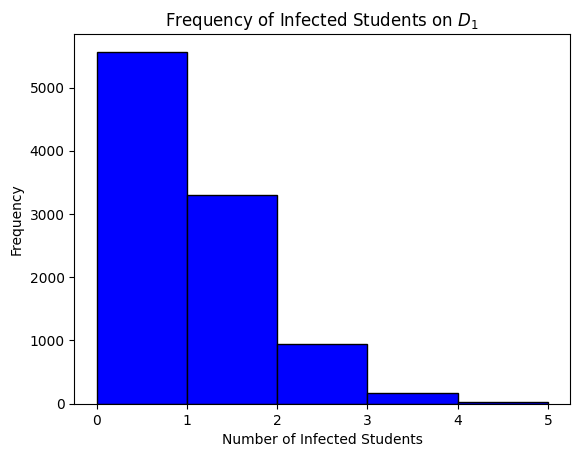

In [222]:
day_1_df['infected'] = day_1_df['infected'] -1
plt.hist(day_1_df['infected'], bins=range(6), range=(1, day_1_df['infected'].max()),color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Number of Infected Students')
plt.ylabel('Frequency')
plt.title(r'Frequency of Infected Students on $D_1$')

# Show plot


file_path = parent_directory + '/figures/q1_hist.png'
plt.savefig(file_path)
plt.show()

<Axes: >

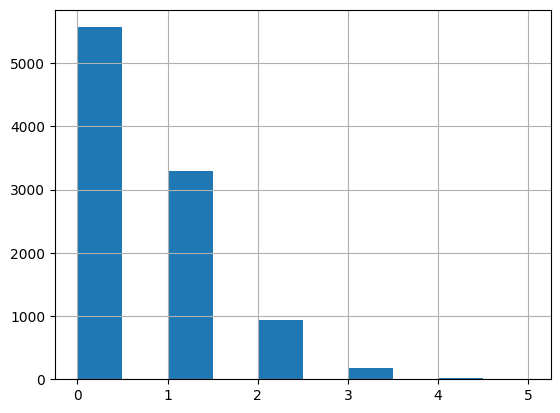

In [223]:
day_1_df['infected'].hist()

Now, plot what a binomial(30, .02) distribution would look like

<Axes: xlabel='bucket'>

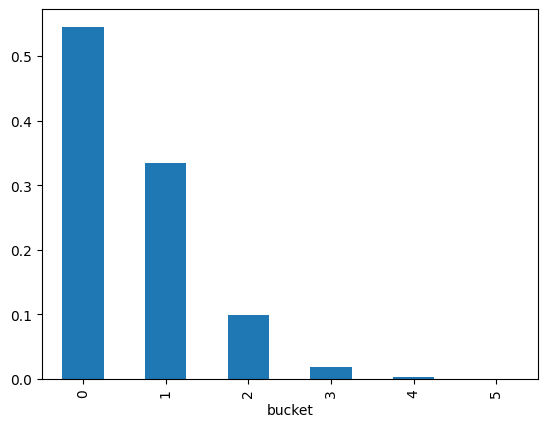

In [224]:
def binomial_buckets(n, p, k):
    df = pd.DataFrame()
    df['bucket'] = np.arange(n + 1)
    df['frequency'] = binom.pmf(np.arange(n + 1), n, p)
    df['frequency'] = df['frequency']
    df['population'] = round(df['frequency']*k,0)

    return df.set_index('bucket')

day_1_expected = binomial_buckets(30, .02, no_mask.trial.max()).loc[:5,:]

day_1_expected['frequency'].plot(kind='bar')


In [225]:
day_1_expected['population']
# day_1_df['infected']

bucket
0    5455.0
1    3340.0
2     988.0
3     188.0
4      26.0
5       3.0
Name: population, dtype: float64

In [226]:
day_1_observed['day'] = range(6)
hist = pd.merge(day_1_observed,day_1_expected, left_on='day',right_on='bucket')

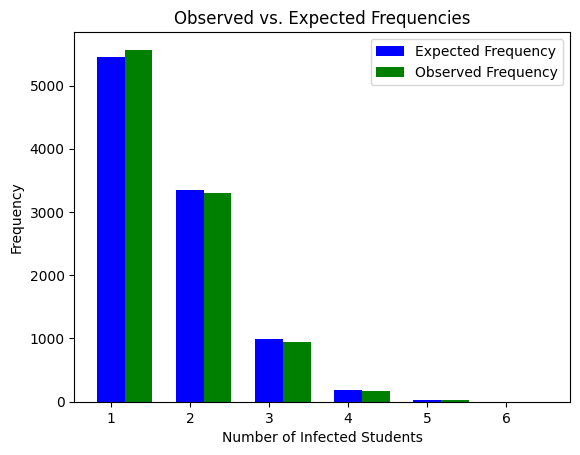

In [356]:

bar_width = .35
index = range(1, 7)
plt.bar(index, hist['population'], bar_width, label='Expected Frequency', color='blue')
plt.bar([i + bar_width for i in index], hist['count'], bar_width, label='Observed Frequency', color='green')

plt.xlabel('Number of Infected Students')
plt.ylabel('Frequency')
plt.title('Observed vs. Expected Frequencies')

plt.legend()
file_path = parent_directory + '/figures/q2_hist_obs_vs_exp.png'
plt.savefig(file_path)
plt.show()

Visual inspection tells us our hypothesis may be correct, and to reject the null hypothesis that the distribution is not binoial(30, .02). To confirm this, we will do a chi squared test to confirm our hypothesis.

The sum of the population column may not equal the number of trials we had due to rounding, so we alter the last record to reflect the last bucket to have the remaining number of trials.

In [228]:
day_1_expected['population'].sum()

10000.0

In [229]:
observed = day_1_observed['count']
expected = day_1_expected['population'].astype(int)
chi_sq = chisquare(observed,expected)
print(f'Test Statistic: {round(chi_sq[0],2)} \nP-value = {round(chi_sq[1],2)}')

Test Statistic: 7.01 
P-value = 0.22


In [357]:
crit_val = chi2.ppf(1-.05, 5)
print(f'Critical x^2 value = {crit_val}')

Critical x^2 value = 11.070497693516351


The Chi Square test statistic is less than the significant value at a .05% confidence level, and the p-value is greater than .05. Thus, we fail to reject the null hypothesis that the distirbution of students infected on day 1 is distributed as binomial(30, .02)

# Question 2
What is the expected number of kids that Tommy infects on Day 1?

The expected number of students Tommy infects on day one can be estimated using the simulation, by simply taking the average number of students infected on day 1 (where day 0 is the first day that Tommy came to school) across all trials. Note, this value includes Tommy himself as he is also infected on Day 1.

In [231]:
simulated_mean = day_1_df['contagious'].mean()
print(f'Average number of students infected on day 1: {simulated_mean}')

Average number of students infected on day 1: 1.58


This can also be calculated analytically, by using the expected value formula for a binomial distribution:
$$
E[X] = np
$$

Where n is the number of students and p is the probability of tommy infecting other students. Note, this value represent the new infections, so to include tommy we must add 1

In [232]:
true_mean = 30 * .02 + 1
print(f'Expected value of students infected on day 1: {true_mean}')

Expected value of students infected on day 1: 1.6


In [233]:
day_2_df, day_2_observed = get_infected_count(2, no_mask)

In [234]:
day_2_df['infected'].mean()

2.4593

In [235]:
day_2_observed

,contagious,count,percent
0,1.0,3080,0.3080
1,2.0,2903,0.2903
2,3.0,1961,0.1961
3,4.0,1094,0.1094
4,5.0,558,0.0558
5,6.0,240,0.0240
6,7.0,116,0.0116
7,8.0,31,0.0031
8,9.0,13,0.0013
9,10.0,3,0.0003


# Question 3
What is the expected number of kids that are infected by Day 2 (you can
count Tommy if you want)?

In [236]:
import math
def calc_exposure_probability(num_students_infected):
    infectiousness_rate = .02
    infected_students = [1-infectiousness_rate for i in range(num_students_infected)]
    students = infected_students
    exposure = 1 - math.prod(students)
    return exposure

def day_2_infected_prob_given_day_1(day_2_infected, day_1_infected):
    susceptible_students = 30-day_1_infected
    exposure = calc_exposure_probability(day_1_infected+1)
    day_2_prob = binom.pmf(k=day_2_infected,n=susceptible_students,p=exposure)
    return day_2_prob

def cum_prob_day_2(num_students):
    probability_list = []
    for s in range(num_students+1):
        day_1 = num_students-s
        day_2 = num_students-day_1
        prob_a_given_b = day_2_infected_prob_given_day_1(day_2,day_1)
        prob_a = binom.pmf(k=day_1,n=30,p=.02)
        prob_b = prob_a_given_b*prob_a
        probability_list.append(prob_b)
    return sum(probability_list)

data = []
for i in range(11):
    expected_day_2 = []
    additional_students_infected = i
    cumulative_probability = cum_prob_day_2(i)
    data.append({'infected_students': additional_students_infected,
                 'probability': cumulative_probability})
    expected_day_2.append(cumulative_probability)
expected_day_2 = pd.DataFrame(data)
expected_day_2['hfx'] = expected_day_2['probability'] * expected_day_2['infected_students']

In [237]:
expected_day_2

,infected_students,probability,hfx
0,0,0.297553,0.000000
1,1,0.285647,0.285647
2,2,0.195743,0.391486
3,3,0.115494,0.346483
4,4,0.059656,0.238622
5,5,0.027537,0.137685
6,6,0.011565,0.069388
7,7,0.004463,0.031238
8,8,0.001591,0.012732
9,9,0.000527,0.004739


In [238]:
expected_day_2['hfx'].sum() + 1 # plus 1 to include Tommy

2.5196409932865924

In [239]:
day_2_df['infected'].mean()

2.4593

# Question 4a


Simulate the number of kids that are infected on Days 1,2,. . . . Do this many
times. What are the (estimated) expected numbers of kids that are infected
by Day i, i = 1, 2, . . .?

In [240]:
no_mask.head(30)

,Unnamed: 0,trial,day,masked,vaccinated,infected,contagious,exposure
0,0,1.0,0.0,0.0,0.0,1.0,1.0,0.020000
1,1,1.0,1.0,0.0,0.0,3.0,3.0,0.058808
2,2,1.0,2.0,0.0,0.0,5.0,5.0,0.096079
3,3,1.0,3.0,0.0,0.0,9.0,6.0,0.114158
4,4,1.0,4.0,0.0,0.0,12.0,7.0,0.131874
5,5,1.0,5.0,0.0,0.0,17.0,8.0,0.149237
6,6,1.0,6.0,0.0,0.0,20.0,8.0,0.149237
7,7,1.0,7.0,0.0,0.0,22.0,5.0,0.096079
8,8,1.0,8.0,0.0,0.0,22.0,2.0,0.039600
9,9,1.0,9.0,0.0,0.0,22.0,0.0,0.000000


In [241]:

summary = pd.pivot_table(
    no_mask,
    index=['day'],
    values='contagious',
    aggfunc=['mean'],
).reset_index()
summary.columns = ['day', 'mean_infected']
summary['day'] = summary['day'] +1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


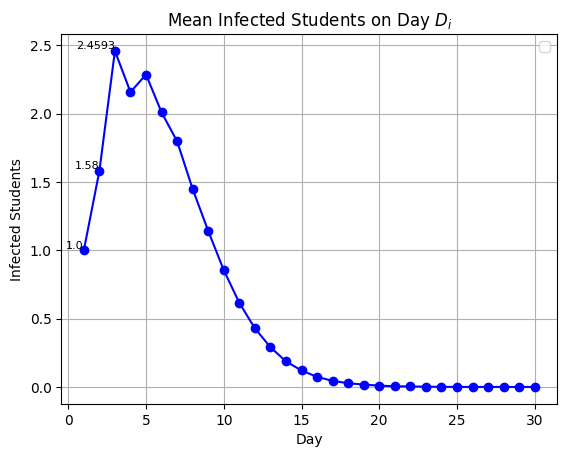

In [242]:
plt.plot(summary['day'], summary['mean_infected'], marker='o', color='blue', linestyle='-')
for i, (day, value) in enumerate(zip(summary['day'], summary['mean_infected'])):
    if i <3:
        plt.text(day, value, f'{value}', ha='right', va='bottom', fontsize=8)


# Add labels and title
plt.xlabel('Day')
plt.ylabel('Infected Students')
plt.title('Mean Infected Students on Day $D_i$')

# Show plot
plt.grid(True)

plt.legend()
file_path = parent_directory + '/figures/q4a.png'
plt.savefig(file_path)
plt.show()

# Question 4b
Create a histogram of how long the pandemic will last

In [243]:
pandemic_length = no_mask.loc[no_mask['contagious'] == 0]
pandemic_length = pd.pivot_table(
    pandemic_length,
    index=['trial'],
    values='day',
    aggfunc=["min"],
).reset_index()
pandemic_length.columns = ['trial', 'lastDay']
pandemic_length

,trial,lastDay
0,1.0,9.0
1,2.0,16.0
2,3.0,7.0
3,4.0,10.0
4,5.0,4.0
...,...,...
9995,9996.0,7.0
9996,9997.0,8.0
9997,9998.0,12.0
9998,9999.0,16.0


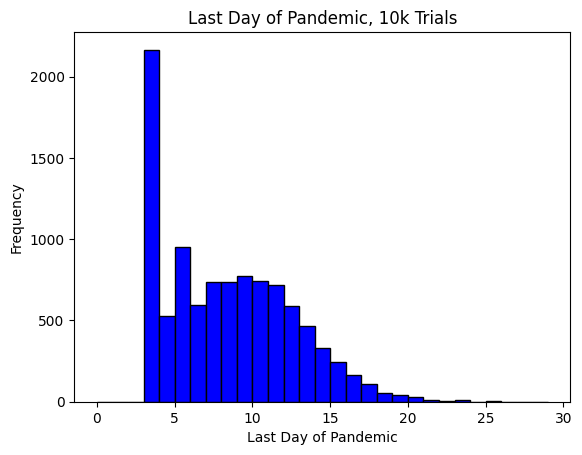

In [244]:
plt.hist(pandemic_length['lastDay'], bins=range(30), range=(3, day_1_df['infected'].max()),color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Last Day of Pandemic')
plt.ylabel('Frequency')
plt.title(r'Last Day of Pandemic, 10k Trials')

# Show plot


file_path = parent_directory + '/figures/q4b.png'
plt.savefig(file_path)
plt.show()

# Question 5
What if each kid has a 50-50 chance of being immunized?

Generate the data

In [245]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
file_path = parent_directory + '/data/50pcnt_vacc_10k.csv'

if not os.path.exists(file_path):
    sim = Controller(number_of_students=30,
                         vaccinated_percentage=.5,
                         vaccine_efficiency=1,
                         masked_percentage=0,
                         mask_effectiveness=.5,
                         infectiousness=.02,
                         sim_length=30,
                         num_trials=10000)

    sim.run_Simulation()
    current_directory = os.getcwd()
    parent_directory = os.path.dirname(current_directory)
    sim.sim_results.to_csv(file_path)

In [246]:
vacc_df = pd.read_csv(wd+'/data/50pcnt_vacc_10k.csv')

In [261]:
summary_vacc = pd.pivot_table(
    vacc_df,
    index=['day'],
    values='contagious',
    aggfunc=['mean'],
).reset_index()
summary_vacc.columns = ['day', 'mean_infected']
summary_vacc['day'] = summary ['day']
summary_compare = pd.merge(summary, summary_vacc, on = 'day')
summary_compare

,day,mean_infected
0,1.0,1.0000
1,2.0,1.2945
2,3.0,1.6585
3,4.0,0.8077
4,5.0,0.6458
5,6.0,0.3550
6,7.0,0.2286
7,8.0,0.1262
8,9.0,0.0746
9,10.0,0.0377


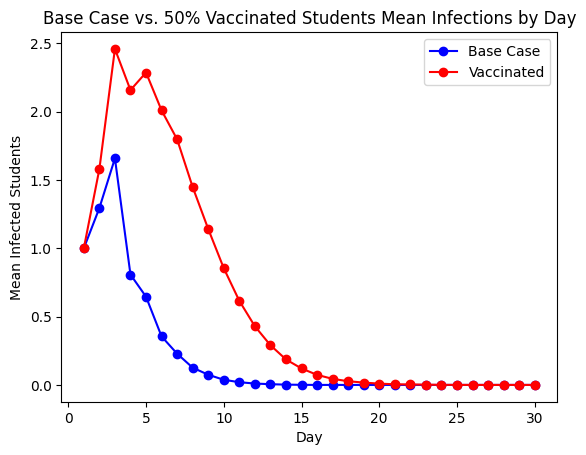

In [264]:
plt.plot(summary_compare['day'],
         summary_compare['mean_infected_y'],
         marker='o', color='blue', linestyle='-', label='Base Case')
plt.plot(summary_compare['day'],
         summary_compare['mean_infected_x'],
         marker='o', color='red', linestyle='-', label='Vaccinated')

plt.xlabel('Day')
plt.ylabel('Mean Infected Students')
plt.title('Base Case vs. 50% Vaccinated Students Mean Infections by Day')

plt.legend()
file_path = parent_directory + '/figures/Q5a.png'
plt.savefig(file_path)
plt.show()

In [267]:
hist

,contagious,count,percent,day,frequency,population
0,1.0,5566,0.5566,0,0.545484,5455.0
1,2.0,3295,0.3295,1,0.333970,3340.0
2,3.0,941,0.0941,2,0.098828,988.0
3,4.0,171,0.0171,3,0.018824,188.0
4,5.0,25,0.0025,4,0.002593,26.0
5,6.0,2,0.0002,5,0.000275,3.0


In [270]:
pandemic_length_vacc = vacc_df.loc[vacc_df['contagious'] == 0]
pandemic_length_vacc = pd.pivot_table(
    pandemic_length_vacc,
    index=['trial'],
    values='day',
    aggfunc=["min"],
).reset_index()
pandemic_length_vacc.columns = ['trial', 'lastDay']


In [273]:
pandemic_length_summary = pd.pivot_table(
    pandemic_length,
    index=['lastDay'],
    values='lastDay',
    aggfunc=["count"],
).reset_index()
pandemic_length_summary.columns = ['Last Day', 'Count']
pandemic_length_summary

,Last Day,Count
0,3.0,2165
1,4.0,529
2,5.0,950
3,6.0,592
4,7.0,734
5,8.0,738
6,9.0,776
7,10.0,742
8,11.0,720
9,12.0,588


In [274]:
pandemic_length_vacc_summary = pd.pivot_table(
    pandemic_length_vacc,
    index=['lastDay'],
    values='lastDay',
    aggfunc=["count"],
).reset_index()
pandemic_length_vacc_summary.columns = ['Last Day', 'Count']
pandemic_length_vacc_summary

,Last Day,Count
0,3.0,4984
1,4.0,1148
2,5.0,1661
3,6.0,767
4,7.0,638
5,8.0,300
6,9.0,250
7,10.0,116
8,11.0,64
9,12.0,35


In [279]:
pandemic_length_hist = pd.merge(pandemic_length_vacc_summary,pandemic_length_summary, on='Last Day')
pandemic_length_hist.columns = ['Last Day','Vacc','Base']
pandemic_length_hist

,Last Day,Vacc,Base
0,3.0,4984,2165
1,4.0,1148,529
2,5.0,1661,950
3,6.0,767,592
4,7.0,638,734
5,8.0,300,738
6,9.0,250,776
7,10.0,116,742
8,11.0,64,720
9,12.0,35,588


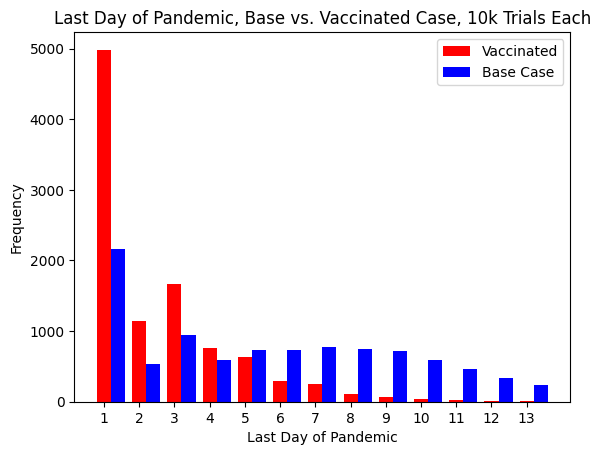

In [289]:

bar_width = .4
index = range(1, 13+1)
plt.bar(index, pandemic_length_hist['Vacc'], bar_width, label='Vaccinated', color='red')
plt.bar([i + bar_width for i in index], pandemic_length_hist['Base'], bar_width, label='Base Case', color='blue')

plt.xticks(range(1, 14))
plt.xlabel('Last Day of Pandemic')
plt.ylabel('Frequency')
plt.title(r'Last Day of Pandemic, Base vs. Vaccinated Case, 10k Trials Each')

plt.legend()
file_path = parent_directory + '/figures/q5c.png'
plt.savefig(file_path)
plt.show()

## Determine Sample Means

In [293]:
mean_base = pandemic_length['lastDay'].mean()
mean_base

7.9129

In [296]:
mean_vacc = pandemic_length_vacc['lastDay'].mean()
mean_vacc

4.4357

## Determine Sample Variances

$S_Z^2 \equiv \frac{1}{r-1} \sum_{i=1}^r\left(Z_i-\bar{Z}_r\right)^2$

In [307]:
def calc_sample_var(pandemic_length_df):
    df = pandemic_length_df
    df['z_bar'] = df['lastDay'].mean()
    df['diff'] = df['lastDay'] - df['z_bar']
    df['numerator'] = df['diff']**2
    numer = df['numerator'].sum()
    denom = df.shape[0]-1
    return numer/denom



16.919205510551055

In [308]:
pandemic_length_sample_var = calc_sample_var(pandemic_length)
pandemic_length_sample_var

16.919205510551055

In [309]:
pandemic_length_vacc_sample_var = calc_sample_var(pandemic_length_vacc)
pandemic_length_vacc_sample_var

3.7648419941994202

## Comparison

$\nu \equiv \frac{\left(\frac{S_X^2}{n}+\frac{S_Y^2}{m}\right)^2}{\frac{\left(S_X^2 / n\right)^2}{n+1}+\frac{\left(S_Y^2 / m\right)^2}{m+1}}-2$

In [334]:
n = pandemic_length.shape[0]
m = pandemic_length_vacc.shape[0]
Sx = pandemic_length_sample_var
Sy = pandemic_length_vacc_sample_var

dof = ((((Sx/n)+(Sy/m))**2)\
      /\
      ((((Sx/n)**2)/(n+1)) + (((Sy/m)**2)/(m+1))))-2

dof = dof.__floor__()
dof

14239

In [339]:
critical_value = scipy.stats.t.ppf(.05, dof)

$\mu_X-\mu_Y \in \bar{X}-\bar{Y} \pm t_{\alpha / 2, \nu} \sqrt{\frac{S_X^2}{n}+\frac{S_Y^2}{m}}$

In [344]:
print(f'Mean difference: {round(mean_base - mean_vacc,2)}')

Mean difference: 3.48


In [346]:
from math import sqrt
l = mean_base - mean_vacc + critical_value*(sqrt((Sx/n)+(Sy/m)))
u = mean_base - mean_vacc - critical_value*(sqrt((Sx/n)+(Sy/m)))

print(f'95% Confidence Interval: [{round(l,2)}, {round(u,2)}]')

95% Confidence Interval: [3.4, 3.55]


In [347]:
l

3.402387653599881